<a href="https://colab.research.google.com/github/ridamjain09/Caifornia_house_pred-LinearReg-/blob/main/ANN_practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
#Import some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Divide the dataset in independent and dependant
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
# Featue Engineering
geography = pd.get_dummies(X['Geography'],drop_first=True ,dtype=int)
gender = pd.get_dummies(X['Gender'],drop_first=True, dtype=int)

In [ ]:
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [ ]:
#Concatinating the above with main
X.drop(['Geography','Gender'],axis=1,inplace=True)
X = pd.concat([X,geography,gender],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3 , random_state=0)

In [ ]:
 #Feature Scaling
 from sklearn.preprocessing import StandardScaler
 sc = StandardScaler()
 x_train = sc.fit_transform(x_train)
 x_test = sc.transform(x_test)

In [ ]:
#Create the ANN model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [ ]:
#Lets inialize the  ANN
classifier = Sequential()

In [ ]:
#Adding the input layer
classifier.add(Dense(units=11,activation='relu')),
classifier.add(Dropout(0.3))
#Adding the hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.25))
#Adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))
#Adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [ ]:
#Compiling the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model_history = classifier.fit(x_train,y_train,validation_split=0.35,batch_size=15,epochs=500,callbacks=early_Stopping)

Epoch 1/500
304/304 [==============================] - 3s 5ms/step - loss: 0.5666 - accuracy: 0.7976 - val_loss: 0.5092 - val_accuracy: 0.7967
Epoch 2/500
304/304 [==============================] - 1s 4ms/step - loss: 0.5151 - accuracy: 0.7982 - val_loss: 0.5053 - val_accuracy: 0.7967
Epoch 3/500
304/304 [==============================] - 2s 5ms/step - loss: 0.5120 - accuracy: 0.7982 - val_loss: 0.5050 - val_accuracy: 0.7967
Epoch 4/500
304/304 [==============================] - 2s 7ms/step - loss: 0.5103 - accuracy: 0.7982 - val_loss: 0.5047 - val_accuracy: 0.7967
Epoch 5/500
304/304 [==============================] - 2s 7ms/step - loss: 0.5068 - accuracy: 0.7982 - val_loss: 0.5050 - val_accuracy: 0.7967
Epoch 6/500
304/304 [==============================] - 1s 4ms/step - loss: 0.5043 - accuracy: 0.7982 - val_loss: 0.5027 - val_accuracy: 0.7967
Epoch 7/500
304/304 [==============================] - 1s 4ms/step - loss: 0.4994 - accuracy: 0.7982 - val_loss: 0.4986 - val_accuracy: 0.7967

In [ ]:
import tensorflow as tf

early_Stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=30,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

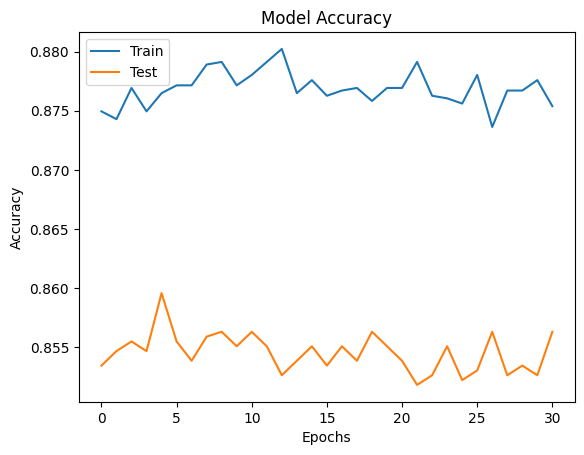

In [ ]:
#plotting model history accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Test'])
plt.show()

In [ ]:
#Prediction for test data
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

94/94 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[2225,  154],
       [ 283,  338]])

In [ ]:
#Accuracy score
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.8543333333333333

In [ ]:
#get the weights and store them as pickle file
classifier.get_weights()

[array([[ 5.4879963e-02, -1.3641030e-01, -2.0488906e-01, -2.9063439e-01,
         -1.6573745e-01,  2.8014833e-02, -1.2874053e-01,  2.5955066e-02,
         -1.8758607e-01, -7.1281932e-02,  3.0651614e-01],
        [-4.8870900e-01,  8.8730574e-01, -3.6960283e-01,  1.1443405e-01,
          1.0966290e+00, -3.3829114e-01, -1.6328166e-01,  3.5282522e-01,
          2.6415586e-01, -9.9918410e-02, -2.2456798e-01],
        [-1.9528875e-01, -6.9944151e-02, -4.4632411e-01, -4.9857941e-01,
         -3.1822121e-01, -1.6804468e-02,  1.5926526e-01,  2.7224420e-02,
         -5.4017121e-01, -1.8752728e-01,  2.3139475e-01],
        [-6.1462289e-01, -1.3874093e-01,  3.9838085e-01,  4.7101143e-01,
         -2.5489628e-01, -1.3093182e-01, -6.8663681e-01, -1.1333210e-01,
         -7.2362863e-02, -7.4360394e-01,  6.6390085e-01],
        [-1.1209892e-02, -1.2933699e+00,  7.1229309e-02,  7.6772261e-01,
         -4.9188799e-01, -4.0234226e-01, -2.1558872e-01,  1.1229008e+00,
          1.4132312e-01, -1.2219331e+0